In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Dataset

In [2]:
df = pd.read_csv('titanic_kaggle.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
#check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Cleaning and Preprocessing

In [8]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [9]:
# drop unnecessary colums
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
# drop missing missing values
df.dropna(inplace = True)

In [12]:
# check for missing values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
df.shape

(712, 8)

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
# to change datatype 
df['Age'] = df['Age'].astype('int')

In [16]:
df['Age'].dtypes

dtype('int32')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    int32  
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 47.3+ KB


In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [19]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.622191,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.502891,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


# Exploratory Data Analysis

In [20]:
df['Survived'].unique()

array([0, 1], dtype=int64)

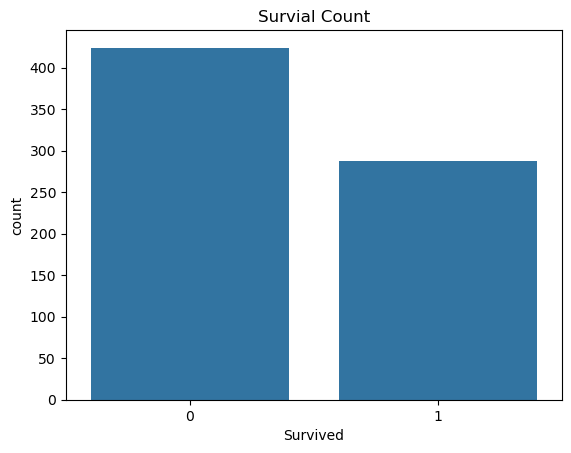

In [21]:
# survial distribution
sns.countplot(x = 'Survived', data = df)
plt.title('Survial Count')
plt.show()

### Analysis : No survival passenger are morethan the survived

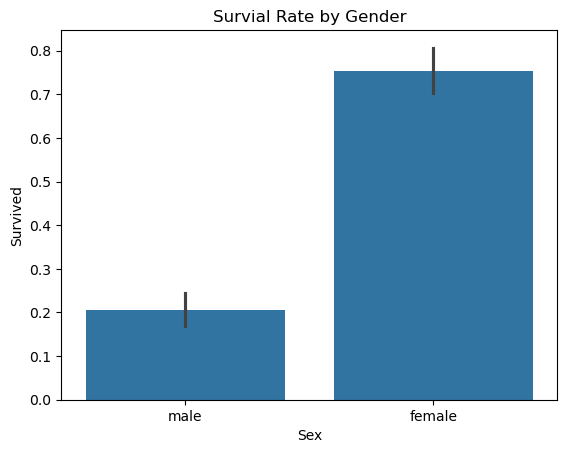

In [22]:
# Gender vs Survival
sns.barplot(x = 'Sex', y = 'Survived', data = df)
plt.title('Survial Rate by Gender')
plt.show()

## Analysis : Female survival are morethan male survival

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


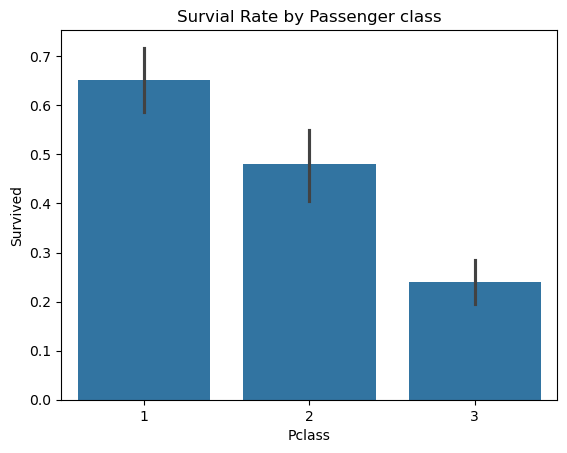

In [24]:
# Pessenger class vs Survival
sns.barplot(x = 'Pclass', y = 'Survived', data = df)
plt.title('Survial Rate by Passenger class')
plt.show()

## Analysis : first class passenger are morethan the second class and third class

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


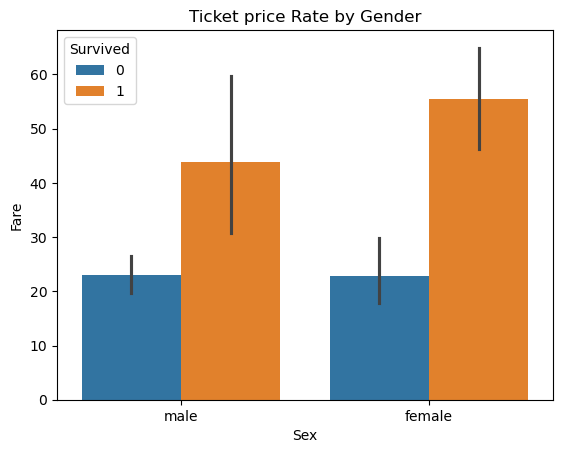

In [26]:
# Gender vs Ticket price
sns.barplot(x = 'Sex', y = 'Fare', data = df, hue = 'Survived')
plt.title('Ticket price Rate by Gender')
plt.show()

## Analysis : female passenger more survival morethan the male passenger

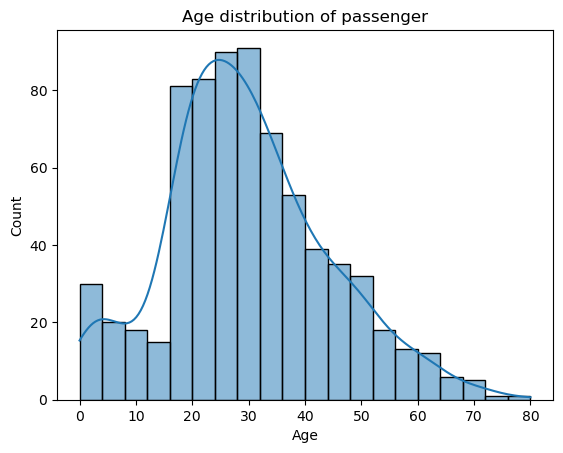

<Figure size 800x600 with 0 Axes>

In [27]:
#Age distribution
sns.histplot(df['Age'], kde = True)
plt.title('Age distribution of passenger')
plt.figure(figsize=(8,6))
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Feature Encoding

In [29]:
# convert categorical values (string/text) data into numbers
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex']) # male=1, female=0

df['Embarked'] = le.fit_transform(df['Embarked']) # C=0, Q=1, S=2 

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2


# Split Data for Training and Testing

In [31]:
# X = feature (input variable)
# Y = target (outcome variable)
X = df.drop('Survived', axis = 1)
Y = df['Survived']

In [32]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7.2500,2
1,1,0,38,1,0,71.2833,0
2,3,0,26,0,0,7.9250,2
3,1,0,35,1,0,53.1000,2
4,3,1,35,0,0,8.0500,2
...,...,...,...,...,...,...,...
885,3,0,39,0,5,29.1250,1
886,2,1,27,0,0,13.0000,2
887,1,0,19,0,0,30.0000,2
889,1,1,26,0,0,30.0000,0


In [33]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [34]:
# Split data into train and test
X_train, X_test, Y_tarin, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 35)

In [35]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
871,1,0,47,1,1,52.5542,2
433,3,1,17,0,0,7.1250,2
875,3,0,15,0,0,7.2250,0
646,3,1,19,0,0,7.8958,2
753,3,1,23,0,0,7.8958,2
...,...,...,...,...,...,...,...
816,3,0,23,0,0,7.9250,2
313,3,1,28,0,0,7.8958,2
567,3,0,29,0,4,21.0750,2
43,2,0,3,1,2,41.5792,0


In [36]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
406,3,1,51,0,0,7.7500,2
401,3,1,26,0,0,8.0500,2
84,2,0,17,0,0,10.5000,2
50,3,1,7,4,1,39.6875,2
886,2,1,27,0,0,13.0000,2
...,...,...,...,...,...,...,...
382,3,1,32,0,0,7.9250,2
131,3,1,20,0,0,7.0500,2
167,3,0,45,1,4,27.9000,2
600,2,0,24,2,1,27.0000,2


In [37]:
Y_tarin

871    1
433    0
875    1
646    0
753    0
      ..
816    0
313    0
567    0
43     1
339    0
Name: Survived, Length: 569, dtype: int64

In [38]:
Y_test

406    0
401    0
84     1
50     0
886    0
      ..
382    0
131    0
167    0
600    1
554    1
Name: Survived, Length: 143, dtype: int64

# Model Building

In [39]:
# logestic regression
log_reg = LogisticRegression(max_iter = 1000)
log_reg

LogisticRegression(max_iter=1000)

In [40]:
log_reg.fit(X_train, Y_tarin)
y_pred_log = log_reg.predict(X_test)

print('Logistic Regression Accuracy :', accuracy_score(Y_test, y_pred_log))

Logistic Regression Accuracy : 0.8531468531468531


In [41]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, Y_tarin)
y_pred_rf = rf.predict(X_test)

print('Rondom Forest Accuracy :', accuracy_score(Y_test, y_pred_rf))

Rondom Forest Accuracy : 0.7902097902097902


# Model Evaluation

In [42]:
print('Confusion Matrix :\n', confusion_matrix(Y_test, y_pred_rf))

Confusion Matrix :
 [[72 19]
 [11 41]]


In [43]:
print('Classification Report :\n', classification_report(Y_test, y_pred_rf))

Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.79      0.83        91
           1       0.68      0.79      0.73        52

    accuracy                           0.79       143
   macro avg       0.78      0.79      0.78       143
weighted avg       0.80      0.79      0.79       143



In [44]:
print("Accuracy :", metrics.accuracy_score(Y_test, y_pred_rf))
print("Precision :", metrics.precision_score(Y_test, y_pred_rf))
print("Recall :", metrics.recall_score(Y_test, y_pred_rf))

Accuracy : 0.7902097902097902
Precision : 0.6833333333333333
Recall : 0.7884615384615384


In [ ]:
#insights
--> Female passenger more survival rate than male passenger
--> 1st Class passenger survived morethan 2nd & 3rd class
--> Younger passengers are more slightly survived chances
--> Passengers who paid higher ticket price were more likely to survive